SVM Demo 
------


In [20]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score as cvs
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
import numpy as np
from IPython.core.display import display, HTML
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
display(HTML("<style>.container { width:100% !important; }</style>"))

`Set dynamic parameters:`

In [21]:
### Set exactly 3 values for each list ###

# RBF
gamma = [0.1, 0.5, 1]

# Ploynomial
degree = [3, 4, 7]

# Penalty parameter C values for the best polynomial kernel
C = [0.01, 1, 10]

# Cross Validation Folds #:
folds = 5

# Generating <font color=red>NOT</font> linearly ($R^2$) separable datasets

`True labels:` <br>
<font color=blue>Blue</font> = 0 <br>
<font color=green>Green</font> = 1

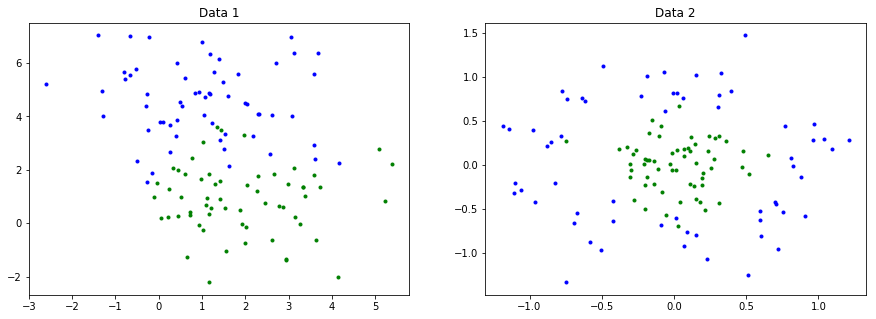

In [22]:
# Generate Data1 
separable = True
while separable:
    samples = make_blobs(n_samples=120, centers=2,random_state=0, cluster_std=1.4)
    blue = samples[0][samples[1] == 0]
    green = samples[0][samples[1] == 1]
    separable = any([blue[:, k].max() < green[:, k].min() or blue[:, k].min() > green[:, k].max() for k in range(2)])

# Plot Data1    
f = plt.figure()
plt.subplot(1,2,1)
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(green[:, 0], green[:, 1], 'g.')
plt.title('Data 1')

# Generate Data2
samples2 = make_circles(n_samples=120, factor=.3, noise=.2)
blue2 = samples2[0][samples2[1] == 0]
green2 = samples2[0][samples2[1] == 1]

# Plot Data2
plt.subplot(1,2,2)    
plt.plot(blue2[:, 0], blue2[:, 1], 'b.')
plt.plot(green2[:, 0], green2[:, 1], 'g.')
plt.title('Data 2')
f.set_figheight(5)
f.set_figwidth(15)

**Motivation**: This data is not linearly separable. We cannot draw a straight line that can classify this data. But, this data can be converted to linearly separable data in higher dimension.

**Question**: Will a linear seperator in higher dimension show up as a straight line in $R^2$?

***
# Generates 3 Polynomial SVM Learning Models: <br>
`Data set:` Data 1 <br>
`Kernel:` Polynomial <br>
`Degree:` Inserted by user (on top)


In [23]:
# Set SVM parameters (poly kernel) and execute algorithm using SKLearn

X = samples[0]
y = samples[1]
model_pol1 = SVC(kernel='poly', gamma='auto', degree=degree[0])
model_pol1.fit(X, y)

model_pol2 = SVC(kernel='poly', gamma='auto', degree=degree[1])
model_pol2.fit(X, y)

model_pol3 = SVC(kernel='poly', gamma='auto', degree=degree[2])
model_pol3.fit(X, y)

models_pol = [model_pol1, model_pol2, model_pol3]

***
# Generates 3 RBF SVM Learning Models: <br>
`Data set:` Data 2 <br>
`Kernel:` RBF <br>
`Gamma:` Inserted by user (on top)

In [24]:
# Set SVM parameters (RBF kernel) and execute algorithm using SKLearn

X2 = samples2[0]
y2 = samples2[1]

model_rbf1 = SVC(kernel='rbf', gamma=gamma[0])
model_rbf1.fit(X2, y2)

model_rbf2 = SVC(kernel='rbf', gamma=gamma[1])
model_rbf2.fit(X2, y2)

model_rbf3 = SVC(kernel='rbf', gamma=gamma[2])
model_rbf3.fit(X2, y2)

models_rbf = [model_rbf1, model_rbf2, model_rbf3]

In [25]:
# Plot helper function

def plot_svc_decision_function(model, ax=None, plot_support=True):
    ax = ax or plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()    
    #Grid
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.column_stack([X.ravel(), Y.ravel()])
    P = model.decision_function(xy).reshape(X.shape)
    
    #Plot
    ax.contour(X, Y, P, colors='k', 
              levels=[-1,0,1], alpha=0.5,
              linestyles=['--', '-', '--'])
    
    #Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=60, lw=2, edgecolors='black', color='none')

## SVM Plot:



`______ =` SVM function boundary <br>
`------ =` Margins<br>
`O =` Support vectors (circled)

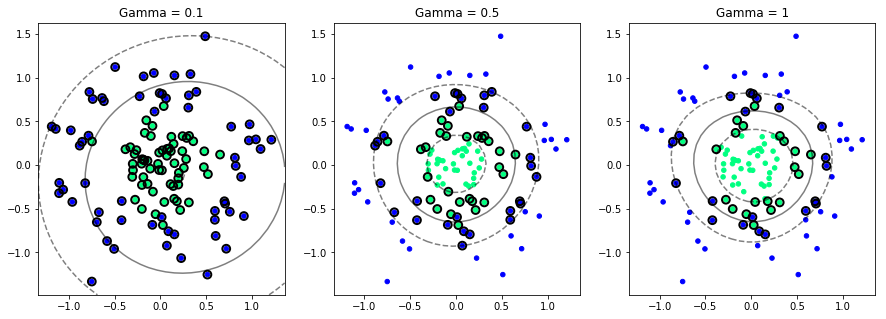

In [26]:
f = plt.figure()

plt.subplot(1,3,1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=20, cmap='winter')
plot_svc_decision_function(model_rbf1);
plt.title(f'Gamma = {gamma[0]}')

plt.subplot(1,3,2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=20, cmap='winter')
plot_svc_decision_function(model_rbf2);
plt.title(f'Gamma = {gamma[1]}')

plt.subplot(1,3,3)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=20, cmap='winter')
plot_svc_decision_function(model_rbf3);
plt.title(f'Gamma = {gamma[2]}')
f.set_figheight(5)
f.set_figwidth(15)


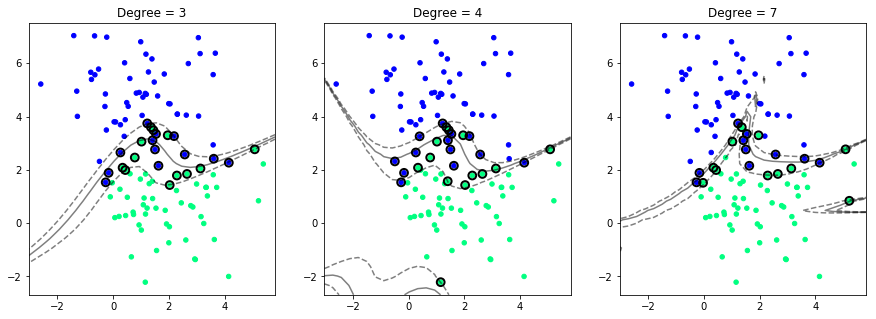

In [27]:
f = plt.figure()

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol1);
plt.title(f'Degree = {degree[0]}')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol2);
plt.title(f'Degree = {degree[1]}')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol3);
plt.title(f'Degree = {degree[2]}')
f.set_figheight(5)
f.set_figwidth(15)

# Cross Validation
**Motivation:** Need a way to choose between models. <br>
We will do so by estimating likely performance of a model on out-of-sample data.

**Question:** What is the drawback of using the train/test split procedure for model evaluation?  <br>
**Answer:** It provides a high variance estimate since changing which instances happen to be in the test set can significantly change test accuracy. <br>
Then what if we created a bunch of train/test splits and calculate the average accuray? 
That's the essence of cross-validation.


Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions ("folds")
2. Use 1 fold as the test set and the **union of the other folds** as the train set
3. Calculate test accuracy
4. Repeat steps K times, using a **different fold** as the test set each time
5. Use the average accuracy as the estimate of **out-of-sample** accuracy

5-fold cross-validation diagram:

<img src="cv_diagram.png">

In [28]:
# Cross Validation 

scores_pol1 = cvs(model_pol1, X, y, cv=folds, scoring='accuracy')
scores_pol2 = cvs(model_pol2, X, y, cv=folds, scoring='accuracy')
scores_pol3 = cvs(model_pol3, X, y, cv=folds, scoring='accuracy')

scores_rbf1 = cvs(model_rbf1, X, y, cv=folds, scoring='accuracy')
scores_rbf2 = cvs(model_rbf2, X, y, cv=folds, scoring='accuracy')
scores_rbf3 = cvs(model_rbf3, X, y, cv=folds, scoring='accuracy')

scores_pol = [scores_pol1.mean(), scores_pol2.mean(), scores_pol3.mean()]
scores_rbf = [scores_rbf1.mean(), scores_rbf2.mean(), scores_rbf3.mean()]

best_pol = scores_pol.index(max(scores_pol)) 
best_rbf = scores_rbf.index(max(scores_rbf))

In [29]:
print(f'Polynomial kernels scores:\n')

print(f'Degree = {degree[0]} || score = {scores_pol[0]}')
print(f'Degree = {degree[1]} || score = {scores_pol[1]}')
print(f'Degree = {degree[2]} || score = {scores_pol[2]}')


print('____________________________________\n')
print(f'RBF kernels scores:\n')

print(f'Gamma = {gamma[0]} || score = {scores_rbf[0]}')
print(f'Gamma = {gamma[1]} || score = {scores_rbf[1]}')
print(f'Gamma = {gamma[2]} || score = {scores_rbf[2]}')


Polynomial kernels scores:

Degree = 3 || score = 0.875
Degree = 4 || score = 0.8666666666666668
Degree = 7 || score = 0.8666666666666668
____________________________________

RBF kernels scores:

Gamma = 0.1 || score = 0.9
Gamma = 0.5 || score = 0.9166666666666666
Gamma = 1 || score = 0.9


## Most Accurate Models:


Text(0.5, 1.0, 'Best Gamma = 0.5')

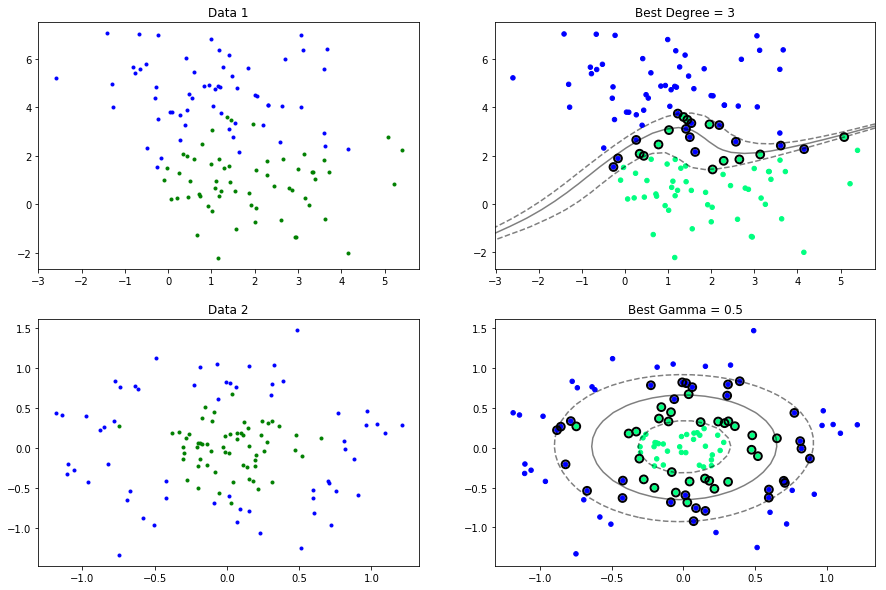

In [30]:
# Plot Data1    
f = plt.figure()
plt.subplot(2,2,1)
plt.plot(blue[:, 0], blue[:, 1], 'b.')
plt.plot(green[:, 0], green[:, 1], 'g.')
plt.title('Data 1')

# Plot Data1 Best Model
plt.subplot(2,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(models_pol[best_pol]);
plt.title(f'Best Degree = {degree[best_pol]}')

# Plot Data2
plt.subplot(2,2,3)    
plt.plot(blue2[:, 0], blue2[:, 1], 'b.')
plt.plot(green2[:, 0], green2[:, 1], 'g.')
plt.title('Data 2')
f.set_figheight(10)
f.set_figwidth(15)

# Plot Data2 Best Model
plt.subplot(2,2,4)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=20, cmap='winter')
plot_svc_decision_function(models_rbf[best_rbf]);
plt.title(f'Best Gamma = {gamma[best_rbf]}')

#### Using different C values for the best polynomial kernel:
**Question:** What will be the influence of higher C values (error penalty) using polynomial kernel?

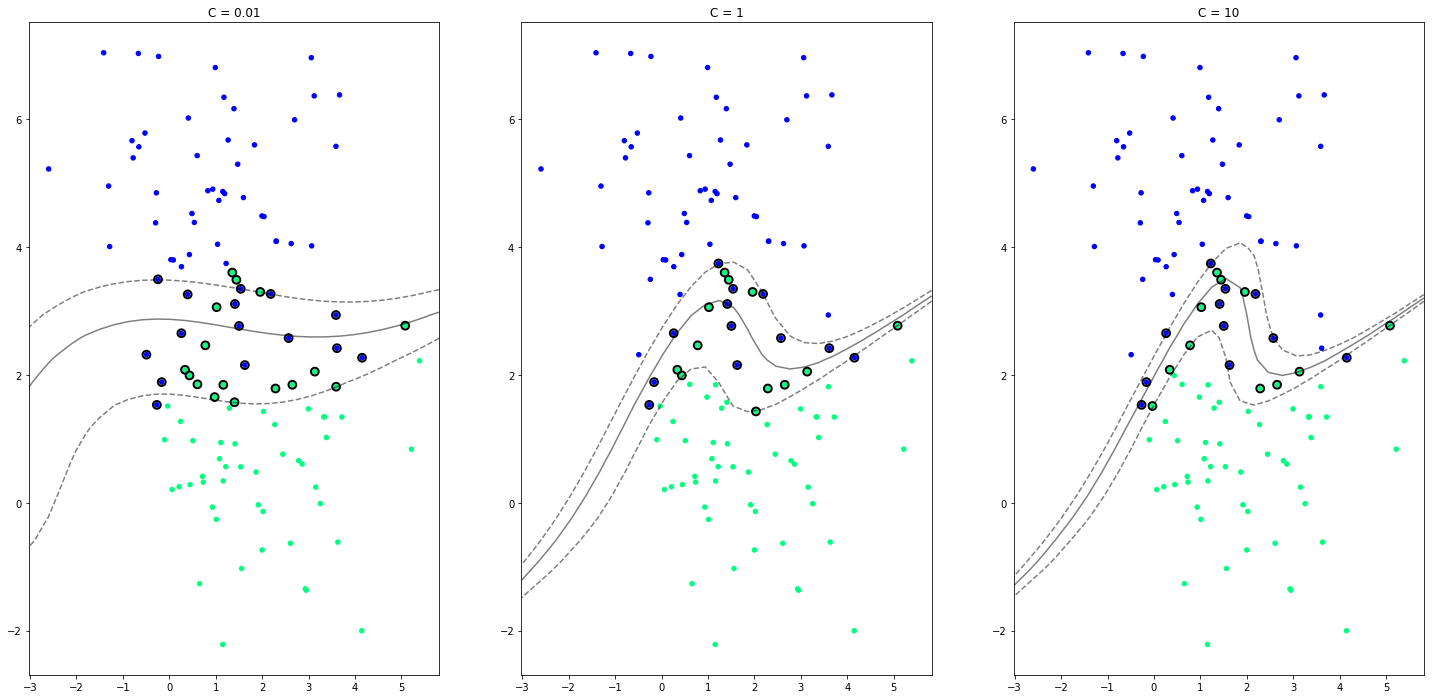

In [31]:
# Set SVM parameters and execute algorithm using provided C values on top
degree_best = degree[best_pol]
model_pol_best1 = SVC(C=C[0], kernel='poly', gamma='auto', degree=degree_best)
model_pol_best1.fit(X, y)

model_pol_best2 = SVC(C=C[1], kernel='poly', gamma='auto', degree=degree_best)
model_pol_best2.fit(X, y)

model_pol_best3 = SVC(C=C[2], kernel='poly', gamma='auto', degree=degree_best)
model_pol_best3.fit(X, y)


# Plot for each C value
f = plt.figure()

plt.subplot(1,3,1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol_best1);
plt.title(f'C = {C[0]}')

plt.subplot(1,3,2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol_best2);
plt.title(f'C = {C[1]}')

plt.subplot(1,3,3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='winter')
plot_svc_decision_function(model_pol_best3);
plt.title(f'C = {C[2]}')
f.set_figheight(12)
f.set_figwidth(25)